In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, r2_score
import plotly.express as px

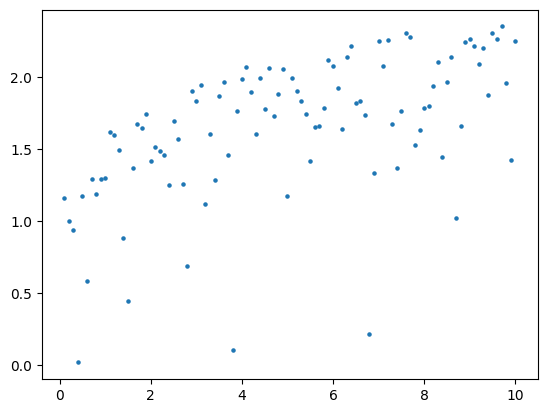

In [107]:
df = pd.read_csv("Data3.csv")

# "X" and "Y" are the list of all xi and yi respectively.
X = [float(item) for item in list(df['x'])]
Y = [float(item) for item in list(df['z'])]

plt.scatter(X, Y, s=5)
plt.show()

In [108]:
XY=[]
X_square=[]

for i in range(100):
  q = X[i] * Y[i]
  XY.append(q)

  p = X[i] ** 2
  X_square.append(p)

avg_XY = np.mean(XY)
avg_X = np.mean(X)
avg_Y = np.mean(Y)
avg_X_square = np.mean(X_square)

In [109]:
m = (avg_XY - avg_X * avg_Y)/(avg_X_square - avg_X ** 2)
c = (avg_Y - m * avg_X)
print("value of m :", m)
print("value of c :", c)

value of m : 0.09419021414817955
value of c : 1.1770620783119932


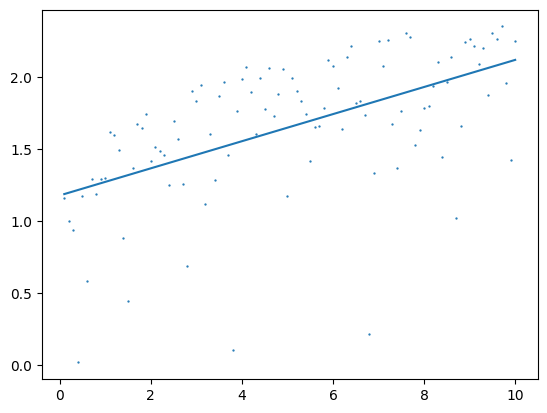

In [110]:
predicted_Y = []
for i in range(100):
  r = m * X[i] + c
  predicted_Y.append(r)

#plotting graph; Given data set is scatter but predicted dataset is in the form of line.
plt.scatter(X, Y, s=0.4, )
plt.plot(X, predicted_Y)

# Verification

In [111]:
#Using linear Regression which is build by SkLearn.
regr = LinearRegression()

x_array = np.array(X).reshape(-1, 1)
y_array = np.array(Y).reshape(-1, 1)

regr.fit(x_array,y_array)
print("Slope: ",regr.coef_)
print("Intercept: ",regr.intercept_)

Slope:  [[0.09419021]]
Intercept:  [1.17706208]


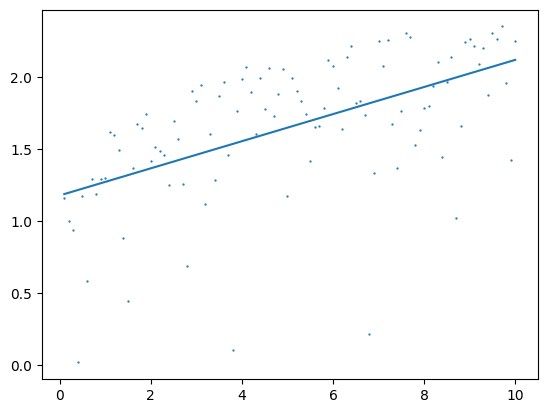

In [112]:
#Now predicting the value of every data.
y_pred_array = regr.predict(x_array)
y_pred_list = list(y_pred_array.reshape(1,-1)[0])

plt.scatter(X, Y, s=0.4)
plt.plot(X, y_pred_list)

# plt.tick_params(left = False, bottom = False)
plt.show()


In [113]:
mae = mean_absolute_error(y_true=y_array,y_pred=y_pred_array)
mse = mean_squared_error(y_true=y_array,y_pred=y_pred_array)
rmse = root_mean_squared_error(y_true=y_array,y_pred=y_pred_array)
r_square = r2_score(y_array, y_pred_array)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r_square:",r_square)

MAE: 0.29467793301310374
MSE: 0.16173044143088552
RMSE: 0.4021572347116057
r_square: 0.3136973226728079


In [114]:
# Error between "prediction by My Own Regression model" and "given data."

mae = mean_absolute_error(y_true=y_array,y_pred=predicted_Y)
mse = mean_squared_error(y_true=y_array,y_pred=predicted_Y)
rmse = root_mean_squared_error(y_true=y_array,y_pred=predicted_Y)
r_square = r2_score(y_array, predicted_Y)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r_square:",r_square)
# [mae, mse, rmse,r_square]

MAE: 0.29467793301310385
MSE: 0.16173044143088552
RMSE: 0.4021572347116057
r_square: 0.3136973226728079


**Here r_square is very low, Even less than 0.5**

# Applying exponential function to check r_square.

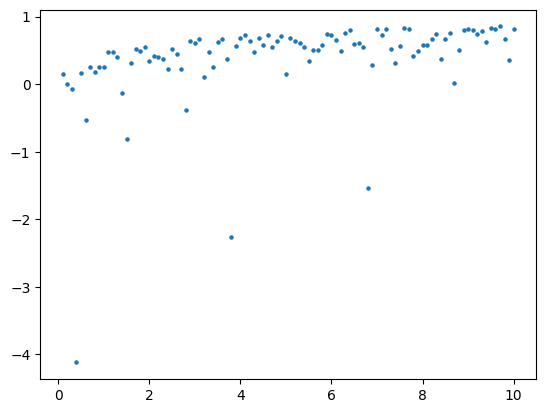

In [115]:
# L is the list of all log(yi).
L =[]
for i in Y:
    k = np.log(i) #log base e
    L.append(k)

plt.scatter(X, L, s=5)
plt.show()

In [116]:
XL=[]
X_square=[]

for i in range(100):
  q = X[i] * L[i]
  XL.append(q)

  p = X[i] ** 2
  X_square.append(p)

avg_XL = np.mean(XL)
avg_X = np.mean(X)
avg_L = np.mean(L)
avg_X_square = np.mean(X_square)

In [117]:
beta = (avg_XL - avg_X * avg_L)/(avg_X_square - avg_X ** 2) #It is value of m.
log_alpha = (avg_L - beta * avg_X)

alpha = np.exp(log_alpha)

print("value of beta :", beta)
# print("value of log_alpha :", log_alpha)
print("value of alpha :", alpha)

value of beta : 0.08257112952899752
value of alpha : 0.9830692431446015


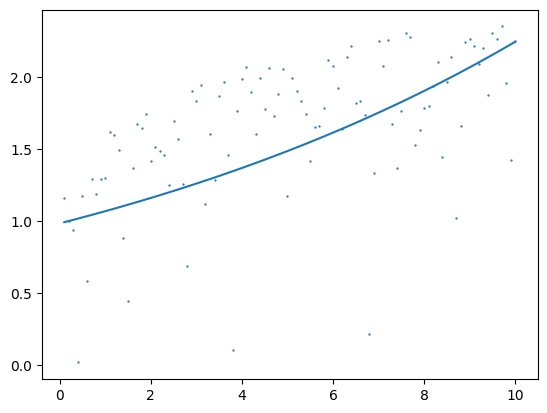

In [118]:
predicted_Y = []
for i in range(100):
  r = alpha * np.exp(beta * X[i])
  predicted_Y.append(r)

#plotting graph; Given data set is scatter but predicted dataset is in the form of line.
plt.scatter(X, Y, s=0.4, )
plt.plot(X, predicted_Y)

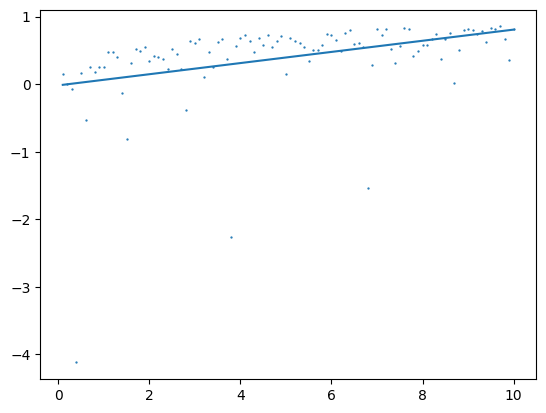

In [119]:
predicted_Y = []
for i in range(100):
#   r = alpha * np.exp(beta * X[i])
  y = np.log(alpha) + beta * X[i]
  r = y
  predicted_Y.append(r)

#plotting graph; Given data set is scatter but predicted dataset is in the form of line.
plt.scatter(X, L, s=0.4, )
plt.plot(X, predicted_Y)

In [120]:
# Error between "prediction by My Own Regression model" and "given data."

mae = mean_absolute_error(y_true=y_array,y_pred=predicted_Y)
mse = mean_squared_error(y_true=y_array,y_pred=predicted_Y)
rmse = root_mean_squared_error(y_true=y_array,y_pred=predicted_Y)
r_square = r2_score(y_array, predicted_Y)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r_square:", r_square)
# [mae, mse, rmse, r_square]

MAE: 1.2632395065781865
MSE: 1.7323987153763363
RMSE: 1.3162061826994798
r_square: -6.351429118982884
